In [1]:
import pandas as pd

# File paths
files = [
    'C:/Users/adity/Downloads/la_liga1/season-1819.csv',
    'C:/Users/adity/Downloads/la_liga1/season-1920.csv',
    'C:/Users/adity/Downloads/la_liga1/season-2021.csv'
]

# Read and combine datasets
barcelona_matches = []
for file in files:
    df = pd.read_csv(file)
    # Filter matches where Barcelona is either home or away team
    df_barcelona = df[(df['HomeTeam'] == 'Barcelona') | (df['AwayTeam'] == 'Barcelona')]
    df_barcelona = df_barcelona.drop(columns=['Referee','Date'], errors='ignore')
    barcelona_matches.append(df_barcelona)

# Combine all filtered datasets
barcelona_df = pd.concat(barcelona_matches, ignore_index=True)

# Display the first few rows
print(barcelona_df)


C:\Users\adity\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


       HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  AS  HST  AST  \
0     Barcelona      Alaves     3     0   H     0     0   D  25   3    9    0   
1    Valladolid   Barcelona     0     1   A     0     0   D   7  10    4    5   
2     Barcelona      Huesca     8     2   H     3     2   H  31   7   15    3   
3      Sociedad   Barcelona     1     2   A     1     0   H   8  12    5    6   
4     Barcelona      Girona     2     2   D     1     1   D  22   7   11    6   
..          ...         ...   ...   ...  ..   ...   ...  ..  ..  ..  ...  ...   
109    Valencia   Barcelona     2     3   A     0     0   D   9  14    4    7   
110   Barcelona  Ath Madrid     0     0   D     0     0   D  12  11    7    6   
111     Levante   Barcelona     3     3   D     0     2   A  16  17    6    5   
112   Barcelona       Celta     1     2   A     1     1   D  20   4    4    4   
113       Eibar   Barcelona     0     1   A     0     0   D  17   7    3    3   

     HF  AF  HC  AC  HY  AY

####BARCELONA DURING MESSI 

In [3]:
import pandas as pd

# File paths
files = [
    'C:/Users/adity/Downloads/la_liga1/season-1819.csv',
    'C:/Users/adity/Downloads/la_liga1/season-1920.csv',
    'C:/Users/adity/Downloads/la_liga1/season-2021.csv'
]


# Read and combine datasets
barcelona_matches = []
for file in files:
    df = pd.read_csv(file)
    print(f"Processing file: {file}")
    print(f"Total rows before filtering: {df.shape[0]}")
    
    # Ensure consistency in team name and filter matches where Barcelona is either home or away team
    df_barcelona = df[(df['HomeTeam'] == 'Barcelona') | (df['AwayTeam'] == 'Barcelona')]
    print(f"Rows after filtering for Barcelona: {df_barcelona.shape[0]}")
    
    if df_barcelona.empty:
        continue  # Skip if no matches found
    
    df_barcelona = df_barcelona.drop(columns=['Referee', 'Date'], errors='ignore')  # Drop Referee and Date columns if present
    
    # Create a unified column for Barcelona's stats
    df_barcelona['Team'] = 'Barcelona'
    df_barcelona['Opponent'] = df_barcelona.apply(lambda row: row['AwayTeam'] if row['HomeTeam'] == 'Barcelona' else row['HomeTeam'], axis=1)
    
    # Classifier column to indicate if Barcelona played at Home or Away
    df_barcelona['Venue'] = df_barcelona.apply(lambda row: 'Home' if row['HomeTeam'] == 'Barcelona' else 'Away', axis=1)
    
    # Standardizing stats where Barcelona is always the reference
    df_barcelona['Goals'] = df_barcelona.apply(lambda row: row['FTHG'] if row['HomeTeam'] == 'Barcelona' else row['FTAG'], axis=1)
    df_barcelona['GoalsConceded'] = df_barcelona.apply(lambda row: row['FTAG'] if row['HomeTeam'] == 'Barcelona' else row['FTHG'], axis=1)
    df_barcelona['HalfTimeGoals'] = df_barcelona.apply(lambda row: row['HTHG'] if row['HomeTeam'] == 'Barcelona' else row['HTAG'], axis=1)
    df_barcelona['HalfTimeConceded'] = df_barcelona.apply(lambda row: row['HTAG'] if row['HomeTeam'] == 'Barcelona' else row['HTHG'], axis=1)
    df_barcelona['Shots'] = df_barcelona.apply(lambda row: row['HS'] if row['HomeTeam'] == 'Barcelona' else row['AS'], axis=1)
    df_barcelona['ShotsOnTarget'] = df_barcelona.apply(lambda row: row['HST'] if row['HomeTeam'] == 'Barcelona' else row['AST'], axis=1)
    df_barcelona['Fouls'] = df_barcelona.apply(lambda row: row['HF'] if row['HomeTeam'] == 'Barcelona' else row['AF'], axis=1)
    df_barcelona['Corners'] = df_barcelona.apply(lambda row: row['HC'] if row['HomeTeam'] == 'Barcelona' else row['AC'], axis=1)
    df_barcelona['YellowCards'] = df_barcelona.apply(lambda row: row['HY'] if row['HomeTeam'] == 'Barcelona' else row['AY'], axis=1)
    df_barcelona['RedCards'] = df_barcelona.apply(lambda row: row['HR'] if row['HomeTeam'] == 'Barcelona' else row['AR'], axis=1)
    
    # Adding Opponent Stats
    df_barcelona['OpponentGoals'] = df_barcelona['GoalsConceded']
    df_barcelona['OpponentShots'] = df_barcelona.apply(lambda row: row['AS'] if row['HomeTeam'] == 'Barcelona' else row['HS'], axis=1)
    df_barcelona['OpponentShotsOnTarget'] = df_barcelona.apply(lambda row: row['AST'] if row['HomeTeam'] == 'Barcelona' else row['HST'], axis=1)
    df_barcelona['OpponentFouls'] = df_barcelona.apply(lambda row: row['AF'] if row['HomeTeam'] == 'Barcelona' else row['HF'], axis=1)
    df_barcelona['OpponentCorners'] = df_barcelona.apply(lambda row: row['AC'] if row['HomeTeam'] == 'Barcelona' else row['HC'], axis=1)
    df_barcelona['OpponentYellowCards'] = df_barcelona.apply(lambda row: row['AY'] if row['HomeTeam'] == 'Barcelona' else row['HY'], axis=1)
    df_barcelona['OpponentRedCards'] = df_barcelona.apply(lambda row: row['AR'] if row['HomeTeam'] == 'Barcelona' else row['HR'], axis=1)
    
    # Adjusting Full-Time Result (FTR) and Half-Time Result (HTR) to Barcelona's perspective
    def adjust_result(row):
        if row['HomeTeam'] == 'Barcelona':
            return 'W' if row['FTR'] == 'H' else ('L' if row['FTR'] == 'A' else 'D')
        else:
            return 'W' if row['FTR'] == 'A' else ('L' if row['FTR'] == 'H' else 'D')
    
    df_barcelona['Result'] = df_barcelona.apply(adjust_result, axis=1)
    
    # Drop original columns no longer needed
    df_barcelona = df_barcelona[['Team', 'Opponent', 'Venue', 'Result', 'Goals', 'GoalsConceded', 'HalfTimeGoals', 'HalfTimeConceded',
                                 'Shots', 'ShotsOnTarget', 'Fouls', 'Corners', 'YellowCards', 'RedCards',
                                 'OpponentGoals', 'OpponentShots', 'OpponentShotsOnTarget', 'OpponentFouls',
                                 'OpponentCorners', 'OpponentYellowCards', 'OpponentRedCards']]
    
    barcelona_matches.append(df_barcelona)

# Combine all filtered datasets
barcelona_df = pd.concat(barcelona_matches, ignore_index=True)

print(f"Total rows in final dataset: {barcelona_df.shape[0]}")
# Display the first few rows
print(barcelona_df)

output_file = 'C:/Users/adity/Downloads/barcelona_matches.csv'
barcelona_df.to_csv(output_file, index=False)


Processing file: C:/Users/adity/Downloads/la_liga1/season-1819.csv
Total rows before filtering: 380
Rows after filtering for Barcelona: 38
Processing file: C:/Users/adity/Downloads/la_liga1/season-1920.csv
Total rows before filtering: 380
Rows after filtering for Barcelona: 38
Processing file: C:/Users/adity/Downloads/la_liga1/season-2021.csv
Total rows before filtering: 380
Rows after filtering for Barcelona: 38
Total rows in final dataset: 114
          Team    Opponent Venue Result  Goals  GoalsConceded  HalfTimeGoals  \
0    Barcelona      Alaves  Home      W      3              0              0   
1    Barcelona  Valladolid  Away      W      1              0              0   
2    Barcelona      Huesca  Home      W      8              2              3   
3    Barcelona    Sociedad  Away      W      2              1              0   
4    Barcelona      Girona  Home      D      2              2              1   
..         ...         ...   ...    ...    ...            ...         

###BARCA POST MESSI 

In [4]:
import pandas as pd

# File paths for post-Messi seasons
files = [
    'C:/Users/adity/Downloads/season-2122.csv',
    'C:/Users/adity/Downloads/season-2223.csv',
    'C:/Users/adity/Downloads/season-2324.csv'
]

# Read and combine datasets
barcelona_post_messi_matches = []
for file in files:
    df = pd.read_csv(file)
    print(f"Processing file: {file}")
    print(f"Total rows before filtering: {df.shape[0]}")
    
    # Ensure consistency in team name and filter matches where Barcelona is either home or away team
    df_barca_post_messi = df[(df['HomeTeam'] == 'Barcelona') | (df['AwayTeam'] == 'Barcelona')]
    print(f"Rows after filtering for Barcelona: {df_barca_post_messi.shape[0]}")
    
    if df_barca_post_messi.empty:
        continue  # Skip if no matches found
    
    df_barca_post_messi = df_barca_post_messi.drop(columns=['Referee', 'Date'], errors='ignore')  # Drop Referee and Date columns if present
    
    # Create a unified column for Barcelona's stats
    df_barca_post_messi['Team'] = 'Barcelona'
    df_barca_post_messi['Opponent'] = df_barca_post_messi.apply(lambda row: row['AwayTeam'] if row['HomeTeam'] == 'Barcelona' else row['HomeTeam'], axis=1)
    
    # Classifier column to indicate if Barcelona played at Home or Away
    df_barca_post_messi['Venue'] = df_barca_post_messi.apply(lambda row: 'Home' if row['HomeTeam'] == 'Barcelona' else 'Away', axis=1)
    
    # Standardizing stats where Barcelona is always the reference
    df_barca_post_messi['Goals'] = df_barca_post_messi.apply(lambda row: row['FTHG'] if row['HomeTeam'] == 'Barcelona' else row['FTAG'], axis=1)
    df_barca_post_messi['GoalsConceded'] = df_barca_post_messi.apply(lambda row: row['FTAG'] if row['HomeTeam'] == 'Barcelona' else row['FTHG'], axis=1)
    df_barca_post_messi['HalfTimeGoals'] = df_barca_post_messi.apply(lambda row: row['HTHG'] if row['HomeTeam'] == 'Barcelona' else row['HTAG'], axis=1)
    df_barca_post_messi['HalfTimeConceded'] = df_barca_post_messi.apply(lambda row: row['HTAG'] if row['HomeTeam'] == 'Barcelona' else row['HTHG'], axis=1)
    df_barca_post_messi['Shots'] = df_barca_post_messi.apply(lambda row: row['HS'] if row['HomeTeam'] == 'Barcelona' else row['AS'], axis=1)
    df_barca_post_messi['ShotsOnTarget'] = df_barca_post_messi.apply(lambda row: row['HST'] if row['HomeTeam'] == 'Barcelona' else row['AST'], axis=1)
    df_barca_post_messi['Fouls'] = df_barca_post_messi.apply(lambda row: row['HF'] if row['HomeTeam'] == 'Barcelona' else row['AF'], axis=1)
    df_barca_post_messi['Corners'] = df_barca_post_messi.apply(lambda row: row['HC'] if row['HomeTeam'] == 'Barcelona' else row['AC'], axis=1)
    df_barca_post_messi['YellowCards'] = df_barca_post_messi.apply(lambda row: row['HY'] if row['HomeTeam'] == 'Barcelona' else row['AY'], axis=1)
    df_barca_post_messi['RedCards'] = df_barca_post_messi.apply(lambda row: row['HR'] if row['HomeTeam'] == 'Barcelona' else row['AR'], axis=1)
    
    # Adding Opponent Stats
    df_barca_post_messi['OpponentGoals'] = df_barca_post_messi['GoalsConceded']
    df_barca_post_messi['OpponentShots'] = df_barca_post_messi.apply(lambda row: row['AS'] if row['HomeTeam'] == 'Barcelona' else row['HS'], axis=1)
    df_barca_post_messi['OpponentShotsOnTarget'] = df_barca_post_messi.apply(lambda row: row['AST'] if row['HomeTeam'] == 'Barcelona' else row['HST'], axis=1)
    df_barca_post_messi['OpponentFouls'] = df_barca_post_messi.apply(lambda row: row['AF'] if row['HomeTeam'] == 'Barcelona' else row['HF'], axis=1)
    df_barca_post_messi['OpponentCorners'] = df_barca_post_messi.apply(lambda row: row['AC'] if row['HomeTeam'] == 'Barcelona' else row['HC'], axis=1)
    df_barca_post_messi['OpponentYellowCards'] = df_barca_post_messi.apply(lambda row: row['AY'] if row['HomeTeam'] == 'Barcelona' else row['HY'], axis=1)
    df_barca_post_messi['OpponentRedCards'] = df_barca_post_messi.apply(lambda row: row['AR'] if row['HomeTeam'] == 'Barcelona' else row['HR'], axis=1)
    
    # Adjusting Full-Time Result (FTR) and Half-Time Result (HTR) to Barcelona's perspective
    def adjust_result(row):
        if row['HomeTeam'] == 'Barcelona':
            return 'W' if row['FTR'] == 'H' else ('L' if row['FTR'] == 'A' else 'D')
        else:
            return 'W' if row['FTR'] == 'A' else ('L' if row['FTR'] == 'H' else 'D')
    
    df_barca_post_messi['Result'] = df_barca_post_messi.apply(adjust_result, axis=1)
    
    # Drop original columns no longer needed
    df_barca_post_messi = df_barca_post_messi[['Team', 'Opponent', 'Venue', 'Result', 'Goals', 'GoalsConceded', 'HalfTimeGoals', 'HalfTimeConceded',
                                 'Shots', 'ShotsOnTarget', 'Fouls', 'Corners', 'YellowCards', 'RedCards',
                                 'OpponentGoals', 'OpponentShots', 'OpponentShotsOnTarget', 'OpponentFouls',
                                 'OpponentCorners', 'OpponentYellowCards', 'OpponentRedCards']]
    
    barcelona_post_messi_matches.append(df_barca_post_messi)

# Combine all filtered datasets
barca_post_messi_df = pd.concat(barcelona_post_messi_matches, ignore_index=True)

# Save the dataset as a CSV file
output_file = 'C:/Users/adity/Downloads/barcelona_matches_post_messi.csv'
barca_post_messi_df.to_csv(output_file, index=False)

print(f"Total rows in final dataset: {barca_post_messi_df.shape[0]}")
print(f"Dataset saved to {output_file}")


Processing file: C:/Users/adity/Downloads/season-2122.csv
Total rows before filtering: 380
Rows after filtering for Barcelona: 38
Processing file: C:/Users/adity/Downloads/season-2223.csv
Total rows before filtering: 380
Rows after filtering for Barcelona: 38
Processing file: C:/Users/adity/Downloads/season-2324.csv
Total rows before filtering: 380
Rows after filtering for Barcelona: 38
Total rows in final dataset: 114
Dataset saved to C:/Users/adity/Downloads/barcelona_matches_post_messi.csv


In [5]:
df_path = 'C:/Users/adity/Downloads/barcelona_matches.csv'

C:\Users\adity\AppData\Local\Temp\ipykernel_13628\875350464.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


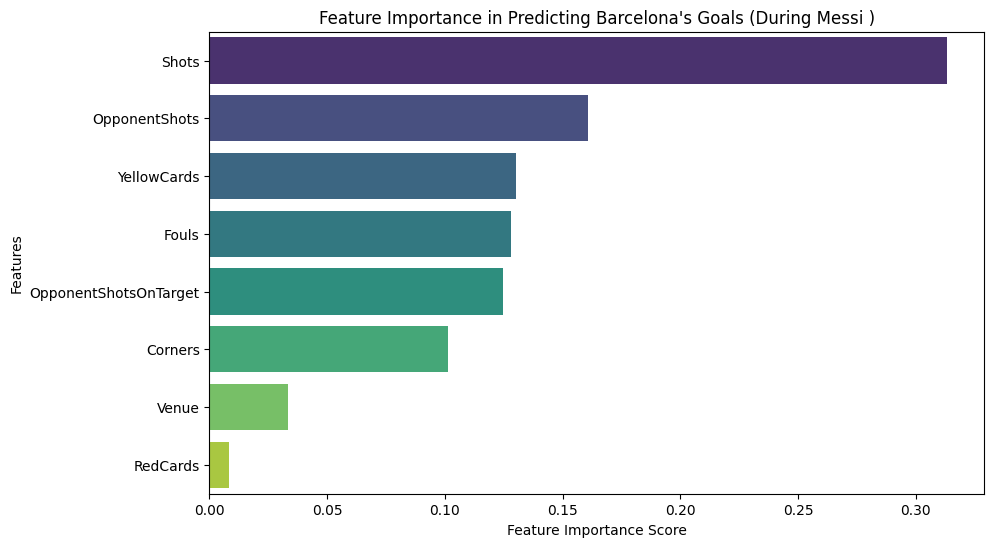

Model Performance Metrics:
Mean Absolute Error (MAE): 1.2978
Mean Squared Error (MSE): 2.5600
Root Mean Squared Error (RMSE): 1.6000
R-squared (R2 Score): -0.3408
   Actual Goals  Predicted Goals
0             1             1.19
1             2             2.21
2             2             0.50
3             2             2.47
4             3             0.30

Feature Importance:
                 Feature  Importance
0                  Shots    0.313432
2          OpponentShots    0.160839
5            YellowCards    0.130318
4                  Fouls    0.127865
3  OpponentShotsOnTarget    0.124545
1                Corners    0.101395
7                  Venue    0.033357
6               RedCards    0.008249


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset for Barcelona with Messi
df_path = 'C:/Users/adity/Downloads/barcelona_matches.csv'
barca_messi_df = pd.read_csv(df_path)

# Select features and target variable
features = ["Shots",  "Corners", "OpponentShots", "OpponentShotsOnTarget", "Fouls", "YellowCards", "RedCards", "Venue"]
target = "Goals"

# Convert categorical 'Venue' to numerical (Home = 1, Away = 0)
barca_messi_df["Venue"] = barca_messi_df["Venue"].map({"Home": 1, "Away": 0})

# Split data into train and test sets
X = barca_messi_df[features]
y = barca_messi_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

evaluation_results = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "R-squared (R2 Score)": r2
}

# Feature Importance Analysis
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Barcelona's Goals (During Messi )")
plt.show()

# Scatter plot of actual vs predicted goals
# #plt.figure(figsize=(8, 5))
# #plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
# #plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)  # Diagonal reference line
# #plt.xlabel("Actual Goals")
# #plt.ylabel("Predicted Goals")
# #plt.title("Actual vs Predicted Goals (Post Messi Era)")
# #plt.grid(True)
# #plt.show()

# Display evaluation results
print("Model Performance Metrics:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.4f}")

# Display predicted vs actual goals
predictions_df = pd.DataFrame({"Actual Goals": y_test.values, "Predicted Goals": y_pred})
print(predictions_df.head())

# Display Feature Importance Dataframe
print("\nFeature Importance:")
print(importance_df)


C:\Users\adity\AppData\Local\Temp\ipykernel_13628\815625131.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


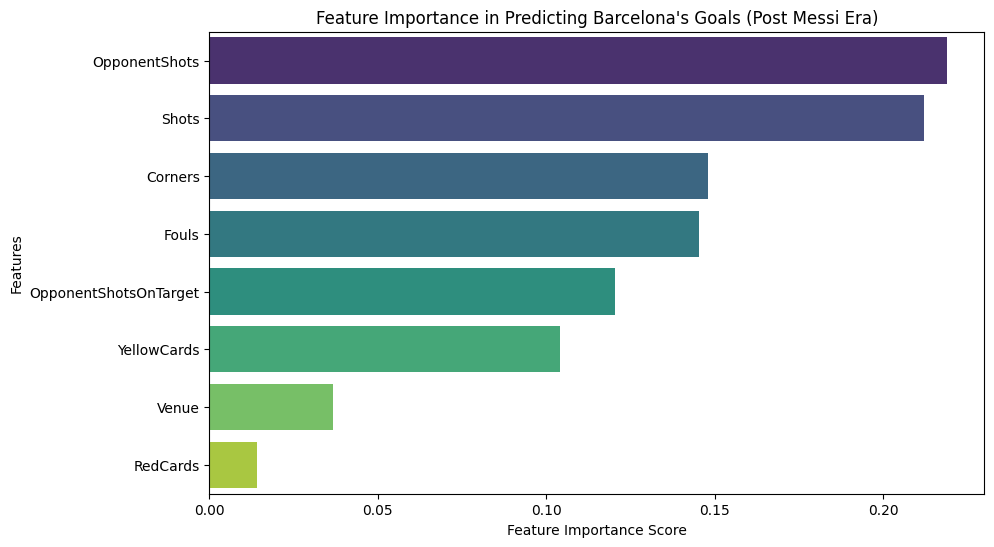

Model Performance Metrics:
Mean Absolute Error (MAE): 1.4013
Mean Squared Error (MSE): 2.3353
Root Mean Squared Error (RMSE): 1.5282
R-squared (R2 Score): -0.0541
   Actual Goals  Predicted Goals
0             5             2.39
1             0             2.26
2             4             2.52
3             4             1.55
4             1             1.64

Feature Importance:
                 Feature  Importance
2          OpponentShots    0.219117
0                  Shots    0.212076
1                Corners    0.148117
4                  Fouls    0.145201
3  OpponentShotsOnTarget    0.120463
5            YellowCards    0.104152
7                  Venue    0.036806
6               RedCards    0.014068


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset for Barcelona with Messi
df_path = 'C:/Users/adity/Downloads/barcelona_matches_post_messi.csv'
barca_messi_df = pd.read_csv(df_path)

# Select features and target variable
features = ["Shots",  "Corners", "OpponentShots", "OpponentShotsOnTarget", "Fouls", "YellowCards", "RedCards", "Venue"]
target = "Goals"

# Convert categorical 'Venue' to numerical (Home = 1, Away = 0)
barca_messi_df["Venue"] = barca_messi_df["Venue"].map({"Home": 1, "Away": 0})

# Split data into train and test sets
X = barca_messi_df[features]
y = barca_messi_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

evaluation_results = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "R-squared (R2 Score)": r2
}

# Feature Importance Analysis
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Barcelona's Goals (Post Messi Era)")
plt.show()

# Scatter plot of actual vs predicted goals
# #plt.figure(figsize=(8, 5))
# #plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
# #plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)  # Diagonal reference line
# #plt.xlabel("Actual Goals")
# #plt.ylabel("Predicted Goals")
# #plt.title("Actual vs Predicted Goals (Post Messi Era)")
# #plt.grid(True)
# #plt.show()

# Display evaluation results
print("Model Performance Metrics:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.4f}")

# Display predicted vs actual goals
predictions_df = pd.DataFrame({"Actual Goals": y_test.values, "Predicted Goals": y_pred})
print(predictions_df.head())

# Display Feature Importance Dataframe
print("\nFeature Importance:")
print(importance_df)
